<a href="https://colab.research.google.com/github/christianadriano/PCA_AquacultureSystem/blob/master/PCA_KMeans_All_Carcinicultura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd #tables for data wrangling
import numpy as np #basic statistical methods 
import io #for uploading data

#Manual option
from google.colab import files
uploaded = files.upload() #choose file dados_relativizados_carcinicultura.csv



Saving dados_relativizados_centralizados_carcinicultura.csv to dados_relativizados_centralizados_carcinicultura.csv


In [2]:
#Upload data from cvs file
df = pd.read_csv(io.StringIO(uploaded['dados_relativizados_centralizados_carcinicultura.csv'].decode('utf-8'))) 
print(df)

    Unnamed: 0         cultura  ...    S19_IR    S20_IE
0            0  Carcinicultura  ... -0.015126 -0.181345
1            1  Carcinicultura  ... -3.007332  1.033912
2            2  Carcinicultura  ...  0.028468 -1.738392
3            3  Carcinicultura  ...  0.168525 -0.540663
4            4  Carcinicultura  ...  0.038207 -0.549427
5            5  Carcinicultura  ...  0.245973 -0.540663
6            6  Carcinicultura  ...  0.068815  1.393230
7            7  Carcinicultura  ... -0.217791 -0.937959
8            8  Carcinicultura  ... -0.385673 -1.043125
9            9  Carcinicultura  ... -0.217791  1.895692
10          10  Carcinicultura  ...  1.097908  0.402913
11          11  Carcinicultura  ...  1.097908  0.402913
12          12  Carcinicultura  ...  1.097908  0.402913

[13 rows x 50 columns]


In [3]:
column_names = df.columns
#Select fatores Ambientais 
feature_names = [name for name in column_names if (name.startswith("S")|name.startswith("E")|name.startswith("A"))] 

#feature_names = list(df.columns["E1_RRLII":"E13_DM"])
#print(feature_names)
list_names = ['fazenda'] + feature_names
df_cultivo = df[list_names]
df_cultivo.head()



,fazenda,E1_RRLII,E2_TIR,E3_PRC,E4_RBC,E5_VPL,E6_LL,E9_R,E10_PPA,E11_TR,E12_DP,E13_DM,A2_DA,A3_UE,A5_UN,A6_UF,A7_EUE,A8_EUN,A9_EUF,A11_PEPN,A12_PPO,A19_AF,A20_AMO,A22_REC,A1_PRC,A2_PRN,A3_PRF,A4_EUC,S1_DEL,S2_UMOL,S3_RTUP,S3_RTUP.1,S4_EDGI,S6_PA,S7_PA,S8_TRUAO,S9_TRUP,S10_SLT,S11_CLP,S13_CPT,S14_DR,S15_APS,S16_E,S17_PAC,S18_IG,S19_IR,S20_IE
0,1,-0.942112,-0.839782,-0.747442,-0.884302,-0.254734,-0.273158,-0.673110,-0.397504,0.006537,-0.508001,-1.425162,-0.758457,-0.486930,-0.925341,1.523464,3.361357,-0.981900,1.548494,0.288406,0.899046,0.005799,-0.035433,0.288675,5.970000e-10,1.760000e-10,1.450000e-10,-3.354904,3.435828,-1.066987,-0.199190,-0.326474,-0.382908,1.777040,-1.078517,2.007685,-0.746154,-2.865112,3.253395,-1.077251,-0.632771,3.463754,-0.786190,-0.547723,-1.614284,-0.015126,-0.181345
1,2,2.444167,2.196693,1.370910,2.539184,1.943953,2.340385,2.166584,-1.043447,-0.852734,1.143001,-1.425162,-0.508045,-0.485603,0.273754,-0.409546,0.339940,2.538890,2.031101,0.435067,1.625857,-0.064077,-0.079352,-3.464102,-3.005706e+00,-2.281014e+00,-1.695427e+00,0.990997,-0.394728,0.671476,3.363483,-0.316466,-0.406004,0.961309,-0.073856,-1.156982,2.590560,-0.797934,-0.662433,0.386925,1.712666,-0.301291,2.243712,-0.547723,2.435664,-3.007332,1.033912
2,3,-0.777345,-0.422557,-0.268325,-0.540195,-0.417138,-0.354454,-0.772770,1.281949,-0.852734,2.794003,1.221568,-0.494140,-0.486010,0.762122,-0.225905,-0.495083,0.292514,0.809588,-0.734712,-0.413912,-0.428646,-0.618300,0.288675,1.204142e-01,8.797816e-01,6.545044e-01,0.322879,-0.028327,0.529238,-0.523894,-0.601030,-0.593053,-1.407373,1.236002,-0.475027,0.751090,0.649301,0.120472,-1.092631,-0.870714,-0.297869,0.546967,-0.547723,-0.311308,0.028468,-1.738392
3,4,-0.738076,-0.589447,-0.489040,-0.536485,-0.363371,-0.321661,-0.674301,-0.009938,-0.852734,-0.508001,-0.101797,-0.464100,-0.486159,0.126027,-0.435625,-0.683614,-0.870315,-0.245603,-0.888383,-1.370484,-0.094458,0.533875,0.288675,1.336618e+00,-1.179946e-01,1.825333e+00,0.071943,-0.183770,0.671476,-0.384217,-0.505275,-0.534305,-1.264620,-0.073856,1.285567,1.339293,0.649301,0.120472,-0.585091,-0.462812,-0.296728,-0.786190,-0.547723,-0.506681,0.168525,-0.540663
4,5,-0.213248,0.235732,0.395775,0.001547,-0.193271,-0.114267,-0.492830,2.573836,-0.852734,1.143001,0.559885,-0.274286,-0.485371,0.659405,-0.751543,-0.169375,-1.310781,-0.747296,1.795601,-0.167502,3.080332,0.471207,0.288675,5.632915e-01,1.674473e+00,7.846607e-01,0.037439,-0.368821,0.671476,-0.547476,-0.567991,-0.567760,-1.288072,2.545860,-0.344358,0.184276,0.649301,0.120472,-1.174914,-0.870714,-0.297869,-0.382607,-0.547723,-0.367129,0.038207,-0.549427


In [4]:
#Look at correlations 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

corr = df_cultivo.corr()

# using a styled panda's dataframe from https://stackoverflow.com/a/42323184/1215012
cmap = 'coolwarm'

def magnify():
    return [dict(selector="th", props=[("font-size", "7pt")]),
            dict(selector="td", props=[('padding', "0em 0em")]),
            dict(selector="th:hover", props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover", 
                 props=[('max-width', '200px'), ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


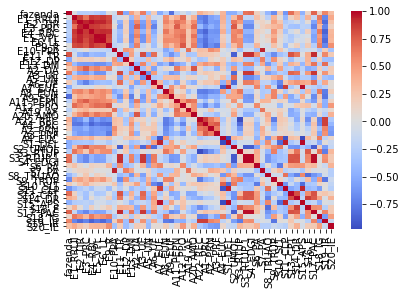

In [5]:
#smaller chart
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm')

In [6]:
#check which ones are statiscally significant
from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

p_values = calculate_pvalues(df_cultivo)


In [7]:
#Plot p-values
def highlight_significant(val):
    '''
    highlight in blue only the statistically significant cells
    '''
    color = 'blue' if val < 0.05 else 'grey'
    return 'color: %s' % color

p_values.style.applymap(highlight_significant)

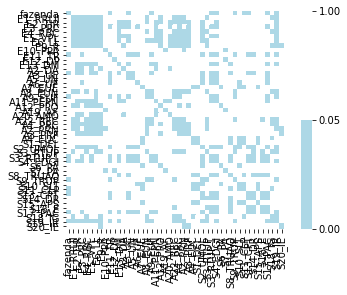

In [8]:
#Smaller plot of p-values
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

np.random.seed(101)
zvals = np.random.rand(100, 100) * 10

# make a color map of fixed colors
cmap_discrete = colors.ListedColormap(['lightblue', 'white'])
bounds=[0,0.05,1]
norm_binary = colors.BoundaryNorm(bounds, cmap_discrete.N)

# tell imshow about color map so that only set colors are used
img = plt.imshow(zvals, interpolation='nearest', origin='lower',
                    cmap=cmap_discrete, norm=norm_binary)

sns.heatmap(p_values, xticklabels=p_values.columns, yticklabels=p_values.columns, cmap=cmap_discrete, norm=norm_binary)

**PCA** 
Now we do the PCA 

In [9]:
#Normalize the data to have MEAN==0
from sklearn.preprocessing import StandardScaler

x = df_cultivo.iloc[:,1:].values
x = StandardScaler().fit_transform(x) # normalizing the features
#print(x)


In [11]:
#Run PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df_cultivo[['fazenda']]], axis = 1)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]


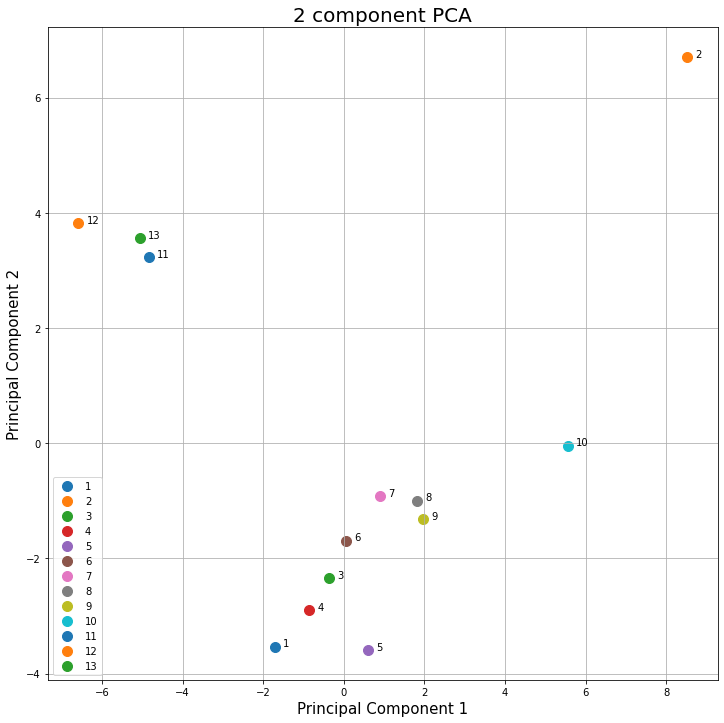

In [23]:
#Visualize results of PCA in Two Dimensions
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = df_cultivo['fazenda'].to_numpy()
print(targets)
for target in targets:
    indicesToKeep = finalDf['fazenda'] == target
    x = finalDf.loc[indicesToKeep, 'principal component 1']
    y = finalDf.loc[indicesToKeep, 'principal component 2']
    ax.scatter(x,y,s = 100)
    ax.annotate(target, (x+0.2,y))

#for name in targets:  
    
ax.legend(targets)
ax.grid()

In [16]:
variance_list =pca.explained_variance_ratio_
print("variance explained by each component:", variance_list)
print("total variance explained:", sum(variance_list))


variance explained by each component: [0.34710103 0.21470911]
total variance explained: 0.5618101357546628


In [58]:
#principal components for each indicador
#print(principalComponents)
#print(targets)
df_clustering = pd.DataFrame({'fazenda': targets,  'pc1':list(principalComponents[:,0]), 'pc2': list(principalComponents[:,1])}, columns=['fazenda', 'pc1','pc2'])
#df_clustering

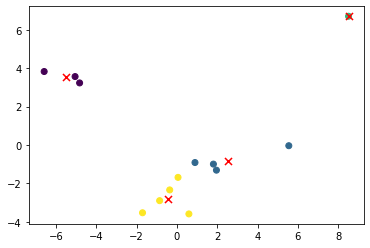

In [59]:
#4 clusters 
from sklearn.cluster import KMeans
model = KMeans(4)
model.fit(df_clustering.iloc[:,1:3])
#print(model.cluster_centers_)

#Plot clusters
plt.scatter(df_clustering.iloc[:,1],df_clustering.iloc[:,2], c=model.labels_.astype(float));
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=50, marker='x', color="red"); # Show the 

In [60]:
#To which cluster each point belongs?
df1= df_clustering.assign(cluster=pd.Series(model.labels_).values)
df1.sort_values(by='cluster')

,fazenda,pc1,pc2,cluster
10,11,-4.827306,3.230962,0
11,12,-6.585427,3.824900,0
12,13,-5.051568,3.562340,0
6,7,0.896834,-0.915588,1
7,8,1.811018,-0.997523,1
8,9,1.960571,-1.312965,1
9,10,5.551798,-0.039297,1
1,2,8.514543,6.703909,2
0,1,-1.705724,-3.532099,3
2,3,-0.357405,-2.342007,3


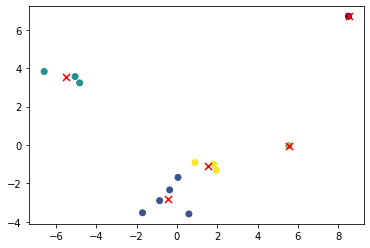

In [63]:
#5 clusters
model = KMeans(5)
model.fit(df_clustering.iloc[:,1:3])
#print(model.cluster_centers_)

#Plot clusters
plt.scatter(df_clustering.iloc[:,1],df_clustering.iloc[:,2], c=model.labels_.astype(float));
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=50,  marker='x', color="red"); # Show the 


In my view, we have two large clusters and three outliers, as the graph above shows.

In [64]:
#To which cluster each point belongs?
df1= df_clustering.assign(cluster=pd.Series(model.labels_).values)
df1.sort_values(by='cluster')

,fazenda,pc1,pc2,cluster
1,2,8.514543,6.703909,0
0,1,-1.705724,-3.532099,1
2,3,-0.357405,-2.342007,1
3,4,-0.857561,-2.901732,1
4,5,0.594797,-3.592006,1
5,6,0.055430,-1.688894,1
10,11,-4.827306,3.230962,2
11,12,-6.585427,3.824900,2
12,13,-5.051568,3.562340,2
9,10,5.551798,-0.039297,3


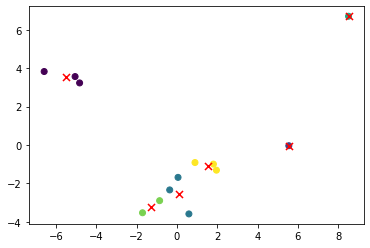

In [65]:
#6 clusters
model = KMeans(6)
model.fit(df_clustering.iloc[:,1:3])
#print(model.cluster_centers_)

#Plot clusters
plt.scatter(df_clustering.iloc[:,1],df_clustering.iloc[:,2], c=model.labels_.astype(float));
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=50, marker='x', color="red"); # Show the 

#7 clusters

In [66]:
#To which cluster each point belongs?
df1= df_clustering.assign(cluster=pd.Series(model.labels_).values)
df1.sort_values(by='cluster')

,fazenda,pc1,pc2,cluster
10,11,-4.827306,3.230962,0
11,12,-6.585427,3.824900,0
12,13,-5.051568,3.562340,0
9,10,5.551798,-0.039297,1
2,3,-0.357405,-2.342007,2
4,5,0.594797,-3.592006,2
5,6,0.055430,-1.688894,2
1,2,8.514543,6.703909,3
0,1,-1.705724,-3.532099,4
3,4,-0.857561,-2.901732,4


In [67]:
#To which cluster each point belongs?
df1= df_clustering.assign(cluster=pd.Series(model.labels_).values)
df1.sort_values(by='cluster')

,fazenda,pc1,pc2,cluster
10,11,-4.827306,3.230962,0
11,12,-6.585427,3.824900,0
12,13,-5.051568,3.562340,0
9,10,5.551798,-0.039297,1
2,3,-0.357405,-2.342007,2
4,5,0.594797,-3.592006,2
5,6,0.055430,-1.688894,2
1,2,8.514543,6.703909,3
0,1,-1.705724,-3.532099,4
3,4,-0.857561,-2.901732,4


Now we analyze 3 Principal Components



In [68]:
#Normalize the data to have MEAN==0
from sklearn.preprocessing import StandardScaler

x = df_cultivo.iloc[:,1:].values
x = StandardScaler().fit_transform(x) # normalizing the features
#print(x)

In [69]:
#Run PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])
finalDf = pd.concat([principalDf, df_cultivo[['fazenda']]], axis = 1)

In [70]:
#principal components for each indicador
#print(principalComponents)
#print(targets)
df_clustering = pd.DataFrame({'fazenda': targets,  'pc1':list(principalComponents[:,0]), 'pc2': list(principalComponents[:,1]),'pc3': list(principalComponents[:,2])}, columns=['cultivo', 'pc1','pc2','pc3'])
#df_clustering

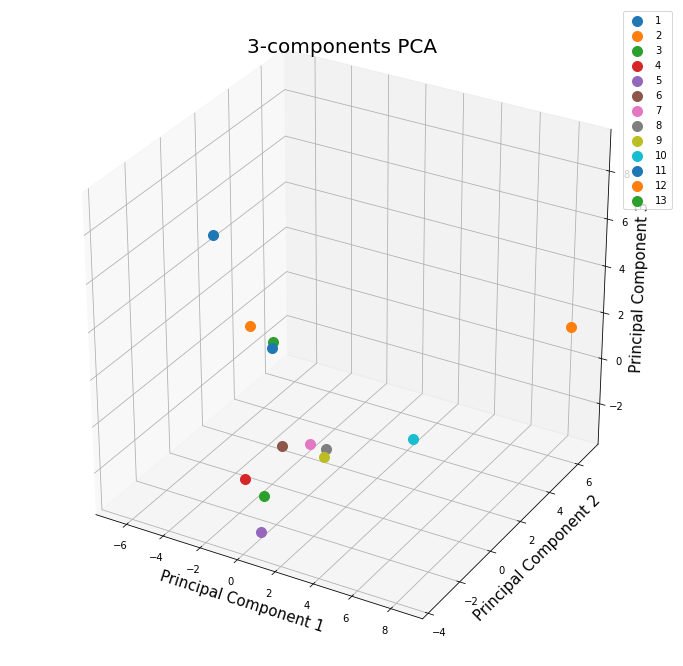

In [71]:
#Visualize results of PCA in Three Dimensions
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3-components PCA', fontsize = 20)
targets = df_cultivo['fazenda'].to_numpy()

for target in targets:
    indicesToKeep = finalDf['fazenda'] == target
    x = finalDf.loc[indicesToKeep, 'principal component 1']
    y = finalDf.loc[indicesToKeep, 'principal component 2']
    z = finalDf.loc[indicesToKeep, 'principal component 3']
    ax.scatter(x,y,z,s = 100)
    
ax.legend(targets)
ax.grid()

Now we search for clusters for 3 principal components

In [72]:
variance_list =pca.explained_variance_ratio_
print("variance explained by each component:", variance_list)
print("total variance explained:", sum(variance_list))

variance explained by each component: [0.34710103 0.21470911 0.16684608]
total variance explained: 0.7286562157167568


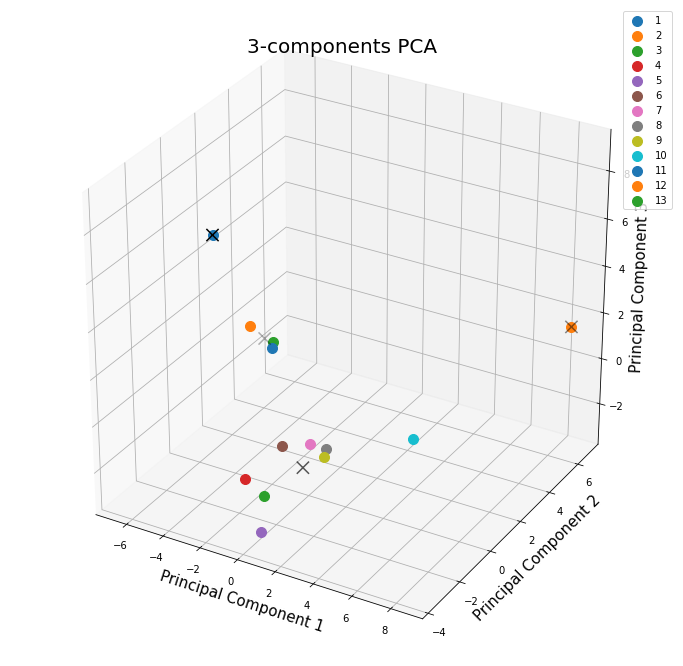

In [73]:
#4 clusters 
from sklearn.cluster import KMeans
model = KMeans(4)
model.fit(df_clustering.iloc[:,1:4])
#print(model.cluster_centers_)

#Plot clusters
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3-components PCA', fontsize = 20)
targets = df_cultivo['fazenda'].to_numpy()

for target in targets:
    indicesToKeep = finalDf['fazenda'] == target
    x = finalDf.loc[indicesToKeep, 'principal component 1']
    y = finalDf.loc[indicesToKeep, 'principal component 2']
    z = finalDf.loc[indicesToKeep, 'principal component 3']
    ax.scatter(x,y,z,s = 100)

ax.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],model.cluster_centers_[:,2], s=150, marker='x', color="black"); # Show the 
   
ax.legend(targets)
ax.grid()

In [76]:
#principal components for each indicador
#print(principalComponents)
#print(targets)
df_clustering = pd.DataFrame({'fazenda': targets,  'pc1':list(principalComponents[:,0]),
                              'pc2': list(principalComponents[:,1]),'pc3': list(principalComponents[:,2])},
                              columns=['fazenda', 'pc1','pc2','pc3'])
#df_clustering

In [77]:
#To which cluster each point belongs?
df1= df_clustering.assign(cluster=pd.Series(model.labels_).values)
df1.sort_values(by='cluster')


,fazenda,pc1,pc2,pc3,cluster
2,3,-0.357405,-2.342007,-2.410834,0
3,4,-0.857561,-2.901732,-1.432795,0
4,5,0.594797,-3.592006,-2.952575,0
5,6,0.055430,-1.688894,-0.551926,0
6,7,0.896834,-0.915588,-0.769832,0
7,8,1.811018,-0.997523,-0.698738,0
8,9,1.960571,-1.312965,-0.800244,0
9,10,5.551798,-0.039297,0.070453,0
10,11,-4.827306,3.230962,-0.374103,1
11,12,-6.585427,3.824900,-0.140163,1


Comparing k-means of PC12 with PC123, we see that the cluster membership changes completely.

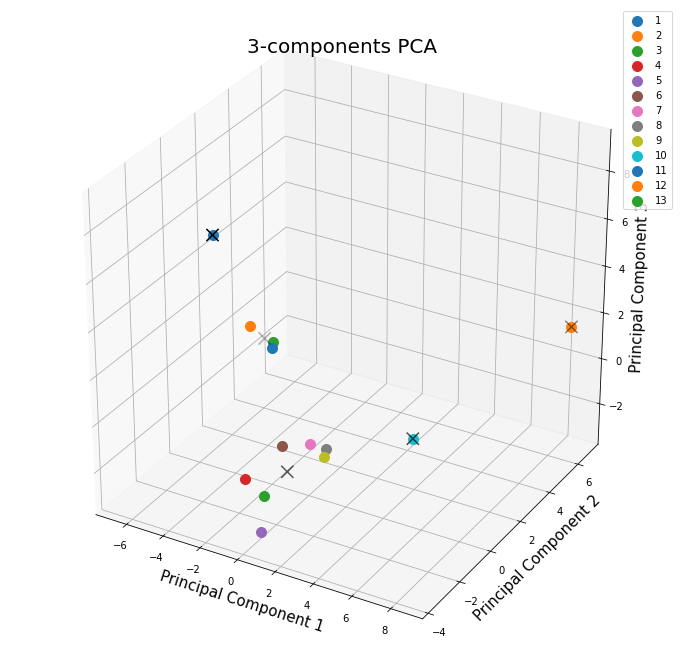

In [79]:
#5 clusters 
from sklearn.cluster import KMeans
model = KMeans(5)
model.fit(df_clustering.iloc[:,1:4])
#print(model.cluster_centers_)

#Plot clusters
#plt.scatter(df_clustering.iloc[:,1],df_clustering.iloc[:,2], c=model.labels_.astype(float));
#plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=50, color="red"); # Show the 

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3-components PCA', fontsize = 20)
targets = df_cultivo['fazenda'].to_numpy()

for target in targets:
    indicesToKeep = finalDf['fazenda'] == target
    x = finalDf.loc[indicesToKeep, 'principal component 1']
    y = finalDf.loc[indicesToKeep, 'principal component 2']
    z = finalDf.loc[indicesToKeep, 'principal component 3']
    ax.scatter(x,y,z,s = 100)
    #ax.annotate(target, (x,y))

ax.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],model.cluster_centers_[:,2], s=150, marker='x', color="black"); # Show the 

#for name in targets:  
    
ax.legend(targets)
ax.grid()

In [48]:
#To which cluster each point belongs?
df1= df_clustering.assign(cluster=pd.Series(model.labels_).values)
df1.sort_values(by='cluster')

,cultivo,pc1,pc2,pc3,cluster
1,NaN,8.514543,6.703909,1.569914,0
2,NaN,-0.357405,-2.342007,-2.410834,1
3,NaN,-0.857561,-2.901732,-1.432795,1
4,NaN,0.594797,-3.592006,-2.952575,1
5,NaN,0.055430,-1.688894,-0.551926,1
6,NaN,0.896834,-0.915588,-0.769832,1
7,NaN,1.811018,-0.997523,-0.698738,1
8,NaN,1.960571,-1.312965,-0.800244,1
10,NaN,-4.827306,3.230962,-0.374103,2
11,NaN,-6.585427,3.824900,-0.140163,2


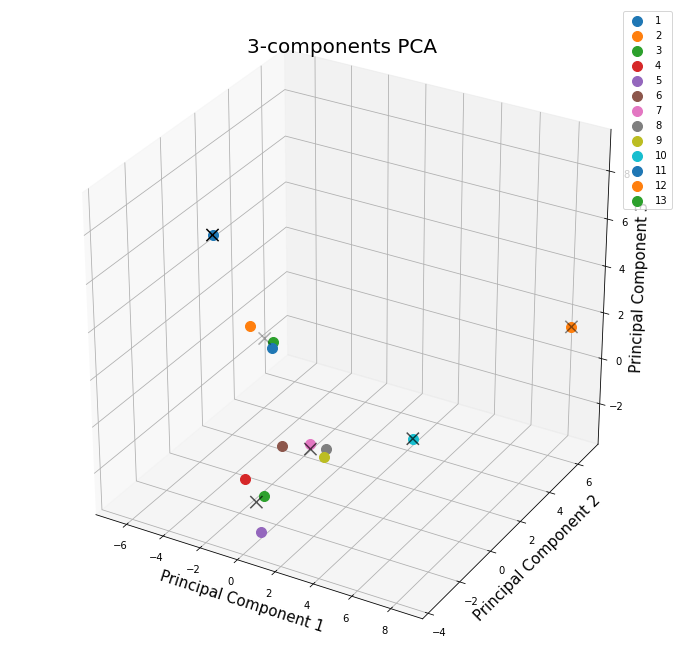

In [56]:
#6 clusters 
from sklearn.cluster import KMeans
model = KMeans(6)
model.fit(df_clustering.iloc[:,1:4])
#print(model.cluster_centers_)

#Plot clusters
#plt.scatter(df_clustering.iloc[:,1],df_clustering.iloc[:,2], c=model.labels_.astype(float));
#plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=50, color="red"); # Show the 

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3-components PCA', fontsize = 20)
targets = df_cultivo['fazenda'].to_numpy()

for target in targets:
    indicesToKeep = finalDf['fazenda'] == target
    x = finalDf.loc[indicesToKeep, 'principal component 1']
    y = finalDf.loc[indicesToKeep, 'principal component 2']
    z = finalDf.loc[indicesToKeep, 'principal component 3']
    ax.scatter(x,y,z,s = 100)

ax.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],model.cluster_centers_[:,2], s=150, marker='x', color="black"); # Show the 
    
ax.legend(targets)
ax.grid()

In [ ]:
#To which cluster each point belongs?
df1= df_clustering.assign(cluster=pd.Series(model.labels_).values)
df1.sort_values(by='cluster')

,cultivo,pc1,pc2,pc3,cluster
2,L. vannamei - Aquafort,-1.868732,-1.242923,-0.858962,0
3,L. vannamei - Northern,-2.248754,-0.696852,-0.549292,0
4,L. vannamei - Aquacrusta,-1.997731,-1.315368,-1.278691,0
10,L. vannamei - Aquarium - baixa densid.,4.057300,0.673011,-0.916374,1
11,L. vannamei - Aquarium - alta densis,4.917808,1.086724,-1.027719,1
12,L. vannamei - Aquarium- bifasico,4.593910,0.791175,-1.124000,1
0,M. rosenbergii - Espirito Santo-,-2.241994,6.765617,2.651040,2
1,P. vannamei - Sergipe - Semi intensivo,1.954346,-3.450184,5.559751,3
5,L. vannamei - HM,-1.835773,-0.216039,-0.824082,4
7,L. vannamei - Carpixe,-1.230136,0.064758,-0.879079,4
